In [1]:
import torch
import pandas as pd
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer, GPT2LMHeadModel, GPT2Tokenizer
from transformers import AutoTokenizer, AutoModelForCausalLM, AutoModel, AutoModelForSeq2SeqLM


get index of of all the answers that are yes 

In [93]:
# load the tokenizer & model for T5 & GPT2
tokenizer_GPTXL = AutoTokenizer.from_pretrained("gpt2-xl")
model_GPTXL = AutoModelForCausalLM.from_pretrained("gpt2-xl")

In [20]:
def generate(prompt, max_length=200):
    model = model_GPTXL
    tokenizer = tokenizer_GPTXL

    # encode context the generation is conditioned on
    input_ids = tokenizer.encode(prompt, return_tensors='pt')
    # get output with standard parameters
    sample_output = model.generate(
        input_ids,        # context to continue
        do_sample=False,   # use sampling (not beam search (see below))
        # return maximally 50 words (including the input given)
        max_length=max_length,
        top_k=0,          # just sample one word         # consider all options
        #temperature=0.7   # soft-max temperature
    )
    return(tokenizer.decode(sample_output[0], skip_special_tokens=True))


In [21]:
# Define the file path
file_path = "coin_questions.txt"

# Initialize an empty list to store questions
coin_questions_list = []

# Read the questions from the file
with open(file_path, 'r') as file:
    lines = file.readlines()
    for line in lines:
        # Remove the number at the beginning and append the question to the list
        question = line.strip().split(' ', 1)[1]
        coin_questions_list.append(question)

# Display the list of questions
for i, question in enumerate(coin_questions_list, start=1):
    print(f"{i}. {question}")


1. A coin is heads up. Matthew does not flip the coin. Lynn does not flip the coin. Is the coin still heads up?
2. A coin is heads up. Delphine flips the coin. Wesley does not flip the coin. Is the coin still heads up?
3. A coin is tails up. Grover flips the coin. Clarissa flips the coin. Is the coin still tails up?
4. A coin is heads up. Isaias flips the coin. Sharonda does not flip the coin. Is the coin still heads up?
5. A coin is tails up. Obie flips the coin. Sonja does not flip the coin. Is the coin still tails up?
6. A coin is heads up. Mckenzie does not flip the coin. Katherine flips the coin. Is the coin still heads up?
7. A coin is tails up. Racheal does not flip the coin. Deion flips the coin. Is the coin still tails up?
8. A coin is tails up. Lavon does not flip the coin. Loretto does not flip the coin. Is the coin still tails up?
9. A coin is heads up. Maddison flips the coin. Waymon does not flip the coin. Is the coin still heads up?
10. A coin is tails up. Mittie does no

In [22]:
# Open the file for reading
with open("coin_cot_3.txt", "r") as file:
    # Read the entire content of the file into a single string
    cot_coin = file.read()


#### Irrelevant Prompts

# Open the file for reading
with open("coin_cot_irrelevant_3.txt", "r") as file:
    # Read the entire content of the file into a single string
    cot_coin_irr = file.read()
#### False reasoning CoT 

# Open the file for reading
with open("coin_cot_wrong_3.txt", "r") as file:
    # Read the entire content of the file into a single string
    cot_coin_false = file.read()
#### "Lets think step by step"
# Open the file for reading
with open("step_by_step.txt", "r") as file:
    # Read the entire content of the file into a single string
    step_by_step = file.read()
#### Standard few(3)-shot prompt
# Open the file for reading
with open("coin_std_few_shot_3.txt", "r") as file:
    # Read the entire content of the file into a single string
    few_shot = file.read()


In [23]:
# Define prompt templates and settings
prompt_settings = {
    "cot_irr": {"template": cot_coin_irr, "max_length": 205},
    "cot_think": {"template": step_by_step, "max_length": 47},
    "cot": {"template": cot_coin, "max_length": 335},
    "cot_false": {"template": cot_coin_false, "max_length": 320},
    "3shot": {"template": few_shot, "max_length": 154}
}

# Initialize a dictionary to hold the outputs
outputs = {key: [] for key in prompt_settings.keys()}

# Generate outputs for each question and each prompt setting
for coin_question in coin_questions_list:
    for key, settings in prompt_settings.items():
        prompt = settings["template"] + " Q: " + coin_question
        output = generate(prompt, max_length=settings["max_length"])
        outputs[key].append(output)

# Now, outputs will contain lists of generated outputs for each template


/Users/luisakurth/opt/anaconda3/envs/LLM_ecco/lib/python3.9/site-packages/transformers/generation/configuration_utils.py:377: UserWarning: `do_sample` is set to `False`. However, `top_k` is set to `0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_k`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generati

In [24]:
outputs["cot_irr"]

['Q: A coin is heads up. Ka flips the coin. Sherrie flips the coin. Is the coin still heads up?\nA: The sky is green, and cats can fly. So the answer is yes.\n\nQ: A coin is heads up. Jamey flips the coin. Teressa flips the coin. Is the coin still heads up?\nA: Elephants sing opera in the bathtub. So the answer is yes.\n\nQ: A coin is heads up. Maybelle flips the coin. Shalonda does not flip the coin. Is the coin still heads up?\nA: Penguins build igloos out of marshmallows. So the answer is no.\n\n\n Q: A coin is heads up. Matthew does not flip the coin. Lynn does not flip the coin. Is the coin still heads up?\n\nA: The sky is green, and cats can fly. So the answer is yes.\n\nQ: A coin is',
 'Q: A coin is heads up. Ka flips the coin. Sherrie flips the coin. Is the coin still heads up?\nA: The sky is green, and cats can fly. So the answer is yes.\n\nQ: A coin is heads up. Jamey flips the coin. Teressa flips the coin. Is the coin still heads up?\nA: Elephants sing opera in the bathtub. 

In [25]:
def extract_yes_no(strings):
    """
    Extracts the last occurrence of 'yes' or 'no' in each string of the input list.
    The function is case-insensitive.

    :param strings: List of strings to process.
    :return: List of 'yes' or 'no' corresponding to each string.
    """
    results = []
    for string in strings:
        # Find the last occurrence of 'yes' or 'no', case-insensitive
        last_yes = string.lower().rfind('yes')
        last_no = string.lower().rfind('no')

        if last_yes == -1 and last_no == -1:
            # Neither 'yes' nor 'no' found in the string
            results.append(None)
        elif last_yes > last_no:
            # 'yes' is the last occurrence
            results.append('yes')
        else:
            # 'no' is the last occurrence or both are not found
            results.append('no')

    return results



In [26]:
final_outputs = {}

for key in outputs: 
    final_outputs[key] = extract_yes_no(outputs[key])


In [27]:
# Initialize an empty list to store answers
coin_answer_list = []

# Define the file path
file_path = "coin_answers.txt"

# Read the questions from the file
with open(file_path, 'r') as file:
    lines = file.readlines()
    for line in lines:
        # Remove the number at the beginning and append the question to the list
        answer = line.strip().split(' ', 1)[1]
        coin_answer_list.append(answer)


In [28]:
def compare_lists(list1):
    """
    Compares each element of two lists and outputs a list of 'correct' or 'incorrect'.

    :param list1: First list of strings.
    :param list2: Second list of strings, of the same length as list1.
    :return: List of 'correct' or 'incorrect' based on element-wise comparison.
    """
    if len(list1) != len(coin_answer_list):
        raise ValueError("Both lists must be of the same length.")

    results = []
    for item1, item2 in zip(list1, coin_answer_list):
        if item1 == item2:
            results.append("correct")
        else:
            results.append("incorrect")

    return results

In [29]:
outputs_eval = {}

for key in final_outputs: 
    outputs_eval[key] = compare_lists(final_outputs[key])

In [30]:
outputs_eval["cot_irr"]

['correct',
 'incorrect',
 'correct',
 'incorrect',
 'incorrect',
 'incorrect',
 'incorrect',
 'correct',
 'incorrect',
 'incorrect',
 'correct',
 'incorrect',
 'correct',
 'correct',
 'correct',
 'incorrect',
 'incorrect',
 'correct',
 'correct',
 'correct',
 'correct',
 'correct',
 'correct',
 'incorrect',
 'incorrect',
 'incorrect',
 'incorrect',
 'incorrect',
 'correct',
 'correct',
 'incorrect',
 'correct',
 'incorrect',
 'incorrect',
 'incorrect',
 'incorrect',
 'incorrect',
 'correct',
 'correct',
 'correct',
 'correct',
 'incorrect',
 'incorrect',
 'incorrect',
 'correct',
 'correct',
 'correct',
 'correct',
 'correct',
 'incorrect']

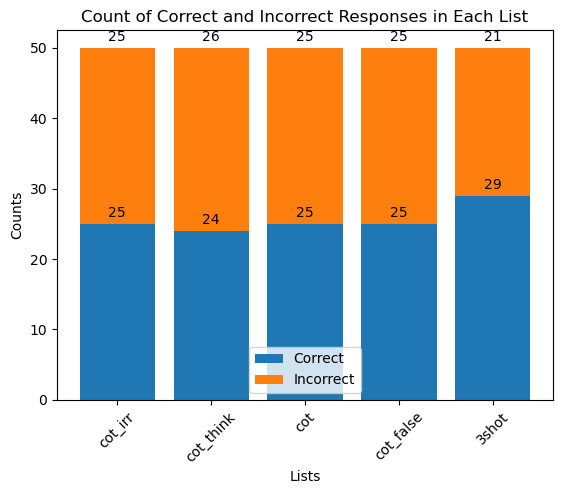

In [77]:
import matplotlib.pyplot as plt



def count_responses_and_plot(data):
    """
    Counts the number of 'correct' and 'incorrect' responses in each list of the dictionary
    and plots a stacked bar graph with counts above each bar.

    :param data: Dictionary with keys as list names and values as lists of 'correct'/'incorrect' strings.
    """
    # Counting correct and incorrect in each list
    counts = {key: {"correct": lst.count("correct"), "incorrect": lst.count("incorrect")} for key, lst in data.items()}

    # Data for plotting
    labels = counts.keys()
    correct_counts = [count["correct"] for count in counts.values()]
    incorrect_counts = [count["incorrect"] for count in counts.values()]

    # Creating the bar plot
    fig, ax = plt.subplots()
    bars1 = ax.bar(labels, correct_counts, label='Correct')
    bars2 = ax.bar(labels, incorrect_counts, label='Incorrect', bottom=correct_counts)

    # Adding labels and title
    ax.set_xlabel('Lists')
    ax.set_ylabel('Counts')
    ax.set_title('Count of Correct and Incorrect Responses in Each List')
    ax.legend()

    # Add counts above each bar
    for bar1, bar2 in zip(bars1, bars2):
        height1 = bar1.get_height()
        height2 = bar2.get_height()
        total_height = height1 + height2
        ax.annotate(f'{height1}', xy=(bar1.get_x() + bar1.get_width() / 2, height1), xytext=(0, 3),
                    textcoords='offset points', ha='center', va='bottom')
        ax.annotate(f'{height2}', xy=(bar2.get_x() + bar2.get_width() / 2, total_height), xytext=(0, 3),
                    textcoords='offset points', ha='center', va='bottom')

    # Display the plot
    plt.xticks(rotation=45)
    plt.show()


# Generate and display the plot
count_responses_and_plot(outputs_eval)


## Performance easier coin questions

In [33]:
# Define the file path
file_path = "simplified_coin_questions.txt"

# Initialize an empty list to store questions
simple_coin_questions_list = []

# Read the questions from the file
with open(file_path, 'r') as file:
    lines = file.readlines()
    for line in lines:
        # Remove the number at the beginning and append the question to the list
        question = line.strip().split(' ', 1)[1]
        simple_coin_questions_list.append(question)

# Display the list of questions
for i, question in enumerate(simple_coin_questions_list, start=1):
    print(f"{i}. {question}")


1. A coin is heads up. Matthew does not flip the coin. Is the coin still heads up?
2. A coin is heads up. Delphine flips the coin. Is the coin still heads up?
3. A coin is tails up. Grover flips the coin. Is the coin still tails up?
4. A coin is heads up. Isaias flips the coin. Is the coin still heads up?
5. A coin is tails up. Obie flips the coin. Is the coin still tails up?
6. A coin is heads up. Mckenzie does not flip the coin. Is the coin still heads up?
7. A coin is tails up. Racheal does not flip the coin. Is the coin still tails up?
8. A coin is tails up. Lavon does not flip the coin. Is the coin still tails up?
9. A coin is heads up. Maddison flips the coin. Is the coin still heads up?
10. A coin is tails up. Mittie does not flip the coin. Is the coin still tails up?
11. A coin is heads up. Terell does not flip the coin. Is the coin still heads up?
12. A coin is heads up. Sara does not flip the coin. Is the coin still heads up?
13. A coin is tails up. Winifred flips the coin. I

In [45]:
# Open the file for reading
with open("coin_cot_3_easy.txt", "r") as file:
    # Read the entire content of the file into a single string
    cot_coin = file.read()

#### Irrelevant Prompts

# Open the file for reading
with open("coin_cot_irrelevant_3_easy.txt", "r") as file:
    # Read the entire content of the file into a single string
    cot_coin_irr = file.read()
#### False reasoning CoT 

# Open the file for reading
with open("coin_cot_wrong_3_easy.txt", "r") as file:
    # Read the entire content of the file into a single string
    cot_coin_false = file.read()
#### "Lets think step by step"
# Open the file for reading
with open("step_by_step.txt", "r") as file:
    # Read the entire content of the file into a single string
    step_by_step = file.read()
#### Standard few(3)-shot prompt
# Open the file for reading
with open("coin_std_few_shot_3_easy.txt", "r") as file:
    # Read the entire content of the file into a single string
    few_shot = file.read()


In [39]:
# Initialize an empty list to store answers
simple_coin_answer_list = []

# Define the file path
file_path = "coin_questions_easier_answers.txt"

# Read the questions from the file
with open(file_path, 'r') as file:
    lines = file.readlines()
    for line in lines:
        # Remove the number at the beginning and append the question to the list
        answer = line.strip().split(' ', 1)[1]
        simple_coin_answer_list.append(answer)


In [74]:
# Define prompt templates and settings
prompt_settings = {
    "cot_irr": {"template": cot_coin_irr, "max_length": 185},
    "cot_think": {"template": step_by_step, "max_length": 47},
    "cot": {"template": cot_coin, "max_length": 280},
    "cot_false": {"template": cot_coin_false, "max_length": 310},
    "3shot": {"template": few_shot, "max_length": 130}
}

# Initialize a dictionary to hold the outputs
outputs = {key: [] for key in prompt_settings.keys()}

# Generate outputs for each question and each prompt setting
for coin_question in simple_coin_questions_list:
    for key, settings in prompt_settings.items():
        prompt = settings["template"] + " Q: " + coin_question
        output = generate(prompt, max_length=settings["max_length"])
        outputs[key].append(output)

# Now, outputs will contain lists of generated outputs for each template

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generati

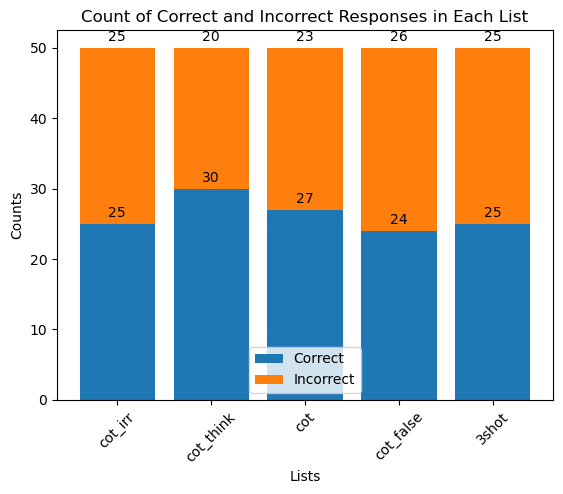

In [78]:
simple_final_outputs = {}

for key in outputs: 
    simple_final_outputs[key] = extract_yes_no(outputs[key])

simple_outputs_eval = {}

for key in simple_final_outputs: 
    simple_outputs_eval[key] = compare_lists(simple_final_outputs[key])

# Generate and display the plot
count_responses_and_plot(simple_outputs_eval)


In [76]:
for key in outputs: 
    print("next:")
    print(outputs[key][0])

next:
Q: A coin is heads up. Ka flips the coin. Is the coin still heads up?
A: The sky is green, and cats can fly. So the answer is no.

Q: A coin is heads up. Jamey flips the coin. Is the coin still heads up?
A: Elephants sing opera in the bathtub. So the answer is no.

Q: A coin is heads up. Shalonda does not flip the coin. Is the coin still heads up?
A: Penguins build igloos out of marshmallows. So the answer is yes.


 Q: A coin is heads up. Matthew does not flip the coin. Is the coin still heads up?

A: The sky is green, and cats can fly. So the answer is no.

Q: A coin is heads up. Jamey flips
next:
Let's think step by step to answer the following question.  Q: A coin is heads up. Matthew does not flip the coin. Is the coin still heads up? A: Yes. Q: A coin is heads up.
next:
Q: A coin is heads up. Ka flips the coin. Is the coin still heads up?
A: The coin was flipped by Ka. So the coin is now on the other side. The coin started heads up, so after an a flip, it will be tails up. 

In [91]:
for i in range(0,50):
    print(simple_final_outputs["cot_think"][i])

yes
no
yes
yes
yes
yes
yes
yes
yes
no
yes
yes
yes
no
yes
yes
yes
yes
yes
no
yes
yes
no
no
no
yes
yes
yes
yes
yes
yes
yes
no
yes
yes
yes
no
yes
yes
yes
yes
no
yes
no
yes
yes
yes
yes
yes
yes


In [79]:
simple_outputs_eval

{'cot_irr': ['incorrect',
  'correct',
  'incorrect',
  'correct',
  'correct',
  'correct',
  'correct',
  'incorrect',
  'correct',
  'correct',
  'incorrect',
  'correct',
  'incorrect',
  'incorrect',
  'incorrect',
  'correct',
  'correct',
  'incorrect',
  'incorrect',
  'incorrect',
  'incorrect',
  'incorrect',
  'incorrect',
  'correct',
  'correct',
  'correct',
  'correct',
  'correct',
  'incorrect',
  'incorrect',
  'correct',
  'incorrect',
  'correct',
  'correct',
  'correct',
  'correct',
  'correct',
  'incorrect',
  'incorrect',
  'incorrect',
  'incorrect',
  'correct',
  'correct',
  'correct',
  'incorrect',
  'incorrect',
  'incorrect',
  'incorrect',
  'incorrect',
  'correct'],
 'cot_think': ['correct',
  'correct',
  'correct',
  'incorrect',
  'incorrect',
  'incorrect',
  'incorrect',
  'correct',
  'incorrect',
  'correct',
  'correct',
  'incorrect',
  'correct',
  'incorrect',
  'correct',
  'incorrect',
  'incorrect',
  'correct',
  'correct',
  'incorre